In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

## Haplotypes assignment to reads

In [2]:
stats, names = [], []

for sample in ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']:
    for replicate in ['rep1', 'rep2', 'rep3']:
        with open(f'/DATA/users/m.magnitov/hap_phen/ATACseq/bam_assigned/{sample}_{replicate}.assignment.log', 'r') as f:
            stats.append([int(x.split('\t')[1]) for x in f.readlines()])
            names.append(sample + '_' + replicate)
            
stats = pd.DataFrame(stats, index = names, columns = ['bam_hap1', 'bam_hap2', 'bam_total', 'unassigned', 'hap1', 'hap2'])
stats

,bam_hap1,bam_hap2,bam_total,unassigned,hap1,hap2
NA12878_rep1,15197382,15198808,15222774,13114018,1057270,1051486
NA12878_rep2,11399141,11399643,11417366,9820165,801554,795647
NA12878_rep3,15016930,15018244,15040682,12891465,1076931,1072286
NA18983_rep1,19204563,19204237,19233073,16894890,1168946,1169237
NA18983_rep2,15496802,15496179,15518624,13562228,979971,976425
NA18983_rep3,12557293,12556857,12574008,11062469,757015,754524
HG01241_rep1,12213154,12214311,12244778,10222017,1009168,1013593
HG01241_rep2,15362234,15363695,15398590,12723722,1341881,1332987
HG01241_rep3,14111909,14112346,14142249,11756204,1192139,1193906
HG02601_rep1,12346039,12345769,12375668,10716127,833880,825661


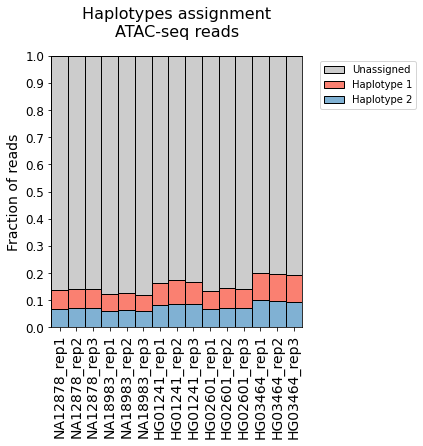

In [3]:
colors = ['#CCCCCC', '#FA8071', '#80B1D3']
labels = ['Unmapped and filtered by MAPQ', 'Duplicates', 'Final reads']

plt.figure(figsize = (3/10*15, 5))
plt.title('Haplotypes assignment\nATAC-seq reads', fontsize = 16, y = 1.05)
for (i, sample_nums) in enumerate(stats.values):
    if i == 0:
        plt.bar(i, sample_nums[2]/sample_nums[2], color = colors[0], 
                width = 1, edgecolor = 'k', label = 'Unassigned')
        plt.bar(i, (sample_nums[4]+sample_nums[5])/sample_nums[2], color = colors[1], 
                width = 1, edgecolor = 'k', label = 'Haplotype 1')
        plt.bar(i, sample_nums[5]/sample_nums[2], color = colors[2], 
                width = 1, edgecolor = 'k', label = 'Haplotype 2')
    else:
        plt.bar(i, sample_nums[2]/sample_nums[2], color = colors[0], 
                width = 1, edgecolor = 'k')
        plt.bar(i, (sample_nums[4]+sample_nums[5])/sample_nums[2], color = colors[1], 
                width = 1, edgecolor = 'k')
        plt.bar(i, sample_nums[5]/sample_nums[2], color = colors[2], 
                width = 1, edgecolor = 'k')
        
plt.legend(bbox_to_anchor = (1.05, 1), fontsize = 10)
plt.xticks(np.arange(len(stats)), stats.index, rotation = 90, fontsize = 14)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize = 12)
plt.ylabel('Fraction of reads', fontsize = 14)
plt.xlim((-0.5, len(stats) -0.5))
plt.ylim((0, 1))
plt.savefig('/DATA/users/m.magnitov/hap_phen/figures/quantification_assigned_atacseq_reads.pdf', bbox_inches = 'tight')
plt.show()

## PCA of ATAC-seq peak counts

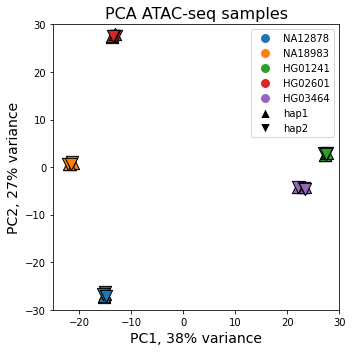

In [4]:
colors = {'NA12878': 'C0', 'NA18983': 'C1', 'HG01241': 'C2', 'HG02601': 'C3', 'HG03464': 'C4'}

pca_data = pd.read_csv('/DATA/users/m.magnitov/hap_phen/ATACseq/asocr/pca_all_allelic.txt', skiprows = 1, sep = '\s+')
pca_data['sample'] = [x.split('_')[0] for x in pca_data['name'].values]
with open('/DATA/users/m.magnitov/hap_phen/ATACseq/asocr/pca_all_allelic.txt') as f:
    pca_data_variance_explained = f.readlines()[0].rstrip('\n')
    
plt.figure(figsize = (5, 5))
plt.title('PCA ATAC-seq samples', fontsize = 16)
for sample in ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']:
    plt.scatter(pca_data[pca_data['sample'] == sample]['PC1'],
                pca_data[pca_data['sample'] == sample]['PC2'], 
                color = colors[sample], edgecolor = 'k', alpha = 0, label = sample)
    plt.scatter(pca_data[(pca_data['sample'] == sample) & (pca_data['allele'] == 1)]['PC1'],
                pca_data[(pca_data['sample'] == sample) & (pca_data['allele'] == 1)]['PC2'],
                marker = '^', color = colors[sample], edgecolor = 'k', s = 150, label = 'hap1')
    plt.scatter(pca_data[(pca_data['sample'] == sample) & (pca_data['allele'] == 2)]['PC1'],
                pca_data[(pca_data['sample'] == sample) & (pca_data['allele'] == 2)]['PC2'],
                marker = 'v', color = colors[sample], edgecolor = 'k', s = 150)
plt.xlabel(f"PC1, {pca_data_variance_explained.split(',')[0].split('=')[1]}% variance", fontsize = 14)
plt.ylabel(f"PC2, {pca_data_variance_explained.split(',')[1].split('=')[1]}% variance", fontsize = 14)
plt.xlim((-25, 30))
plt.ylim((-30, 30))
custom_lines = [Line2D([0], [0], marker='o', color='w', label='NA12878', markerfacecolor='C0', markersize=10),
                Line2D([0], [0], marker='o', color='w', label='NA18983', markerfacecolor='C1', markersize=10),
                Line2D([0], [0], marker='o', color='w', label='HG01241', markerfacecolor='C2', markersize=10),
                Line2D([0], [0], marker='o', color='w', label='HG02601', markerfacecolor='C3', markersize=10),
                Line2D([0], [0], marker='o', color='w', label='HG03464', markerfacecolor='C4', markersize=10),
                Line2D([0], [0], marker='^', color='w', label='hap1', markerfacecolor='k', markersize=10),
                Line2D([0], [0], marker='v', color='w', label='hap2', markerfacecolor='k', markersize=10)]
plt.legend(handles = custom_lines, fontsize = 10)
plt.tight_layout()
plt.savefig('/DATA/users/m.magnitov/hap_phen/figures/quantification_pca_atacseq.pdf', bbox_inches = 'tight')
plt.show()

## Allele-specific open chromatin regions

In [5]:
asocr_auto, asocr_chrX, balanced_auto, balanced_chrX = [], [], [], []
for sample in ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']:
    peaks = pd.read_csv(f'/DATA/users/m.magnitov/hap_phen/ATACseq/peaks/{sample}_peaks.canonical.replicated.no_blacklist.bed',
                        sep = '\t', header = None, names = ['seqname', 'start', 'end', 'peak_id'])
    deseq_res = pd.read_csv(f'/DATA/users/m.magnitov/hap_phen/ATACseq/asocr/asocr_{sample}.csv', sep = '\s+', header = 0)
    deseq_res['peak_id'] = deseq_res.index
    deseq_res = deseq_res.merge(peaks, on = 'peak_id')

    asocr = deseq_res[(deseq_res['padj'] < 0.05) & (abs(deseq_res['log2FoldChange']) > 1)]
    balanced = deseq_res[~deseq_res['peak_id'].isin(asocr['peak_id'].values)]
    
    asocr[['seqname', 'start', 'end', 'peak_id', 'baseMean', 'log2FoldChange', 'padj']].to_csv(f'/DATA/users/m.magnitov/hap_phen/ATACseq/asocr/{sample}_allele_specific.bed', sep = '\t', header = 0, index = 0)
    balanced[['seqname', 'start', 'end', 'peak_id', 'baseMean', 'log2FoldChange', 'padj']].to_csv(f'/DATA/users/m.magnitov/hap_phen/ATACseq/asocr/{sample}_balanced.bed', sep = '\t', header = 0, index = 0)
    
    asocr_auto.append(len(asocr[asocr['seqname'] != 'chrX']))
    asocr_chrX.append(len(asocr[asocr['seqname'] == 'chrX']))
    balanced_auto.append(len(balanced[balanced['seqname'] != 'chrX']))
    balanced_chrX.append(len(balanced[balanced['seqname'] == 'chrX']))

asocr_table = pd.DataFrame([asocr_auto, asocr_chrX, balanced_auto, balanced_chrX]).transpose()
asocr_table.index = ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']
asocr_table.columns = ['ASOCR autosomes', 'ASOCR chrX', 'Balanced autosomes', 'Balanced chrX']
asocr_table

,ASOCR autosomes,ASOCR chrX,Balanced autosomes,Balanced chrX
NA12878,883,177,15811,139
NA18983,1397,0,18762,0
HG01241,560,0,18405,0
HG02601,681,132,14089,104
HG03464,1874,389,25300,213


In [2]:
for sample in ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']:
    peaks = pd.read_csv(f'/DATA/users/m.magnitov/hap_phen/ATACseq/peaks/{sample}_peaks.canonical.replicated.no_blacklist.bed',
                        sep = '\t', header = None, names = ['seqname', 'start', 'end', 'peak_id'])
    deseq_res = pd.read_csv(f'/DATA/users/m.magnitov/hap_phen/ATACseq/asocr/asocr_{sample}.csv', sep = '\s+', header = 0)
    deseq_res['peak_id'] = deseq_res.index
    deseq_res = deseq_res.merge(peaks, on = 'peak_id')

    asocr = deseq_res[(deseq_res['padj'] < 0.05) & (abs(deseq_res['log2FoldChange']) > 1)]
    balanced = deseq_res[~deseq_res['peak_id'].isin(asocr['peak_id'].values)]
    
    asocr = asocr[['seqname', 'start', 'end', 'peak_id', 'baseMean', 'log2FoldChange', 'padj']]
    asocr['event'] = ['allele-specific']*len(asocr)
    
    balanced = balanced[['seqname', 'start', 'end', 'peak_id', 'baseMean', 'log2FoldChange', 'padj']]
    balanced['event'] = ['balanced']*len(balanced)
    
    deseq_res = pd.concat([asocr, balanced]).sort_values('padj')
    deseq_res.to_csv(f'/DATA/users/m.magnitov/hap_phen/ATACseq/asocr/table_asocr_peaks_{sample}.tsv', sep = '\t', header = 1, index = 0)

## Volcano plots

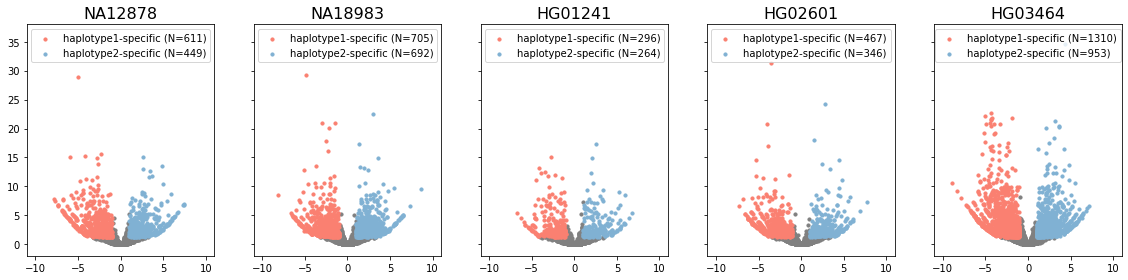

In [8]:
plt.figure(figsize = (16, 4))

for (i, sample) in enumerate(['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']):
    peaks = pd.read_csv(f'/DATA/users/m.magnitov/hap_phen/ATACseq/peaks/{sample}_peaks.canonical.replicated.no_blacklist.bed',
                        sep = '\t', header = None, names = ['seqname', 'start', 'end', 'peak_id'])
    deseq_res = pd.read_csv(f'/DATA/users/m.magnitov/hap_phen/ATACseq/asocr/asocr_{sample}.csv', sep = '\s+', header = 0)
    deseq_res['peak_id'] = deseq_res.index
    deseq_res = deseq_res.merge(peaks, on = 'peak_id')

    asocr = deseq_res[(deseq_res['padj'] < 0.05) & (abs(deseq_res['log2FoldChange']) > 1)]
    balanced = deseq_res[~deseq_res['peak_id'].isin(asocr['peak_id'].values)]
    
    plt.subplot(1, 5, i+1)
    plt.title(sample, fontsize = 16)
    plt.scatter(balanced['log2FoldChange'], -np.log10(balanced['padj']), color = 'grey', s = 10)
    plt.scatter(asocr[asocr['log2FoldChange'] < 0]['log2FoldChange'], 
                -np.log10(asocr[asocr['log2FoldChange'] < 0]['padj']), color = '#FA8071', s = 10,
                label = f"haplotype1-specific (N={str(len(asocr[asocr['log2FoldChange'] < 0]['log2FoldChange']))})")
    plt.scatter(asocr[asocr['log2FoldChange'] > 0]['log2FoldChange'], 
                -np.log10(asocr[asocr['log2FoldChange'] > 0]['padj']), color = '#80B1D3', s = 10,
                label = f"haplotype2-specific (N={str(len(asocr[asocr['log2FoldChange'] > 0]['log2FoldChange']))})")
    plt.legend(loc = 'upper center')
    if i != 0:
        plt.yticks(np.arange(0, 40, 5), [])
    plt.xlim((-11, 11))
    plt.ylim((-2, 38))
    
plt.tight_layout()
plt.savefig('/DATA/users/m.magnitov/hap_phen/figures/quantification_volcanos_atacseq.pdf', bbox_inches = 'tight')
plt.show()

## ASOCR on chrX

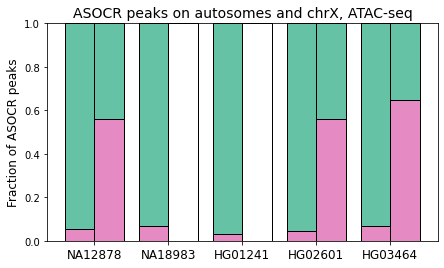

In [10]:
plt.figure(figsize = (7, 4))
plt.title('ASOCR peaks on autosomes and chrX, ATAC-seq', fontsize = 14)
for (i, sample) in enumerate(asocr_table.index):
    sample_asocr_counts = asocr_table.loc[sample].values
    
    plt.bar([i-0.2, i-0.2], [1, sample_asocr_counts[0]/(sample_asocr_counts[0]+sample_asocr_counts[2])], 
            width = 0.4, color = ['#66C2A5', '#E68AC3'], edgecolor = 'k')
    if sample in ['NA18983', 'HG01241']:
        plt.bar([i+0.2], [1], width = 0.4, color = ['w'], edgecolor = 'k')
    else:
        plt.bar([i+0.2, i+0.2], [1, sample_asocr_counts[1]/(sample_asocr_counts[1]+sample_asocr_counts[3])], 
                width = 0.4, color = ['#66C2A5', '#E68AC3'], edgecolor = 'k')
plt.xticks([0, 1, 2, 3, 4], ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464'], fontsize = 12)
plt.ylabel('Fraction of ASOCR peaks', fontsize = 12)
plt.ylim((0, 1))
plt.savefig('/DATA/users/m.magnitov/hap_phen/figures/quantification_fraction_chrX_atacseq.pdf', bbox_inches = 'tight')
plt.show()

## DARs between samples

In [11]:
dars, non_dars = [], []

peaks = pd.read_csv(f'/DATA/users/m.magnitov/hap_phen/ATACseq/peaks/all_peaks.canonical.replicated.no_blacklist.bed',
                    sep = '\t', header = None, names = ['seqname', 'start', 'end', 'peak_id'])
samples = ['NA12878', 'NA18983', 'HG01241', 'HG02601', 'HG03464']

for i in range(0, len(samples)):
    for j in range(i, len(samples)):
        if samples[i] == samples[j]:
            dars.append(0)
            non_dars.append(0)
        else:
            deseq_res = pd.read_csv(f'/DATA/users/m.magnitov/hap_phen/ATACseq/asocr/dars_{samples[j]}_{samples[i]}.csv', sep = '\s+', header = 0)
            deseq_res['peak_id'] = deseq_res.index
            deseq_res = deseq_res.merge(peaks, on = 'peak_id')

            dars_sample = deseq_res[(deseq_res['padj'] < 0.05) & (abs(deseq_res['log2FoldChange']) > 1)]
            non_dars_sample = deseq_res[~deseq_res['peak_id'].isin(dars_sample['peak_id'].values)]

            dars.append(len(dars_sample))
            non_dars.append(len(non_dars_sample))

In [12]:
dars = pd.DataFrame([dars[:5], [0] + dars[5:9], [0, 0] + dars[9:12], [0, 0, 0] +  dars[12:14], [0, 0, 0, 0] + [dars[14]]])
dars = pd.DataFrame(np.array(dars).transpose()+np.array(dars))

dars.iloc[0,0]=np.sum(asocr_table[['ASOCR autosomes', 'ASOCR chrX']].values[0])
dars.iloc[1,1]=np.sum(asocr_table[['ASOCR autosomes', 'ASOCR chrX']].values[1])
dars.iloc[2,2]=np.sum(asocr_table[['ASOCR autosomes', 'ASOCR chrX']].values[2])
dars.iloc[3,3]=np.sum(asocr_table[['ASOCR autosomes', 'ASOCR chrX']].values[3])
dars.iloc[4,4]=np.sum(asocr_table[['ASOCR autosomes', 'ASOCR chrX']].values[4])

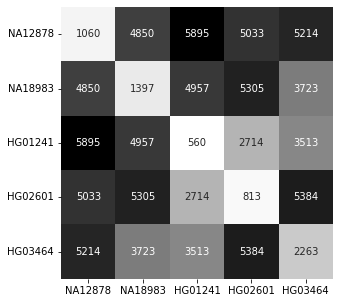

In [14]:
plt.figure(figsize = (5, 5))
sns.heatmap(dars, square = True, annot = True, fmt = 'g', cbar = 0, cmap = 'Greys')
plt.xticks(np.arange(5)+0.5, samples)
plt.yticks(np.arange(5)+0.5, samples, rotation = 0)
plt.savefig('/DATA/users/m.magnitov/hap_phen/figures/quantification_ttseq_heatmap_peaks.pdf', bbox_inches = 'tight')
plt.show()